In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from collections import Counter
import operator
import datetime
from datetime import timedelta
import calendar

In [4]:
df = pd.read_csv("hourly_rental_df")

In [5]:
df

,Unnamed: 0,id,user_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,8,132521,22182,2.0,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
1,20,132535,22190,2.0,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,1/1/2013 12:52,13.018540,77.635240,NaN,NaN,0
2,23,132538,21995,1.0,1286.0,NaN,NaN,NaN,1/1/2013 16:30,NaN,1/1/2013 14:39,12.973448,77.620320,NaN,NaN,0
3,34,132552,22201,1.0,1323.0,NaN,NaN,NaN,1/1/2013 20:00,1/1/2013 0:00,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0
4,47,132569,15846,2.0,142.0,NaN,NaN,NaN,1/2/2013 3:00,NaN,1/1/2013 19:37,12.912810,77.609230,NaN,NaN,0
5,71,132598,21995,2.0,87.0,NaN,NaN,NaN,1/2/2013 12:00,NaN,1/2/2013 8:35,12.970030,77.606580,NaN,NaN,0
6,74,132602,15529,2.0,217.0,NaN,NaN,NaN,1/2/2013 14:30,NaN,1/2/2013 9:04,13.001100,77.623500,NaN,NaN,0
7,76,132605,15846,1.0,142.0,NaN,NaN,NaN,1/2/2013 10:30,NaN,1/2/2013 9:18,12.912810,77.609230,NaN,NaN,0
8,79,132608,22228,2.0,590.0,NaN,NaN,NaN,1/2/2013 11:00,NaN,1/2/2013 10:08,13.008260,77.564330,NaN,NaN,0
9,80,132609,2005,1.0,1086.0,NaN,NaN,NaN,1/2/2013 12:15,1/2/2013 0:00,1/2/2013 10:14,12.907487,77.647290,NaN,NaN,0


In [6]:
np.nan

nan

In [7]:
df['to_date'].count()

4930


# Since these are hourly rentals so i am dropping the entries in which to date is NaN because without those values i cannot determine the amount of time for which the booking was done

# But what I can analyse is that the number of hourly rentals in each area

In [8]:
df_with_to_date = df[pd.notnull(df['to_date'])]

In [9]:
df_with_to_date

,Unnamed: 0,id,user_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
3,34,132552,22201,1.0,1323.0,NaN,NaN,NaN,1/1/2013 20:00,1/1/2013 0:00,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0
9,80,132609,2005,1.0,1086.0,NaN,NaN,NaN,1/2/2013 12:15,1/2/2013 0:00,1/2/2013 10:14,12.907487,77.647290,NaN,NaN,0
11,90,132620,22236,2.0,393.0,NaN,NaN,NaN,1/2/2013 16:00,1/2/2013 0:00,1/2/2013 11:59,13.199560,77.706880,NaN,NaN,0
12,91,132621,18777,1.0,293.0,NaN,NaN,NaN,1/2/2013 17:00,1/2/2013 0:00,1/2/2013 12:15,12.849482,77.663187,NaN,NaN,0
13,101,132632,694,2.0,6.0,NaN,NaN,NaN,1/2/2013 16:00,1/2/2013 0:00,1/2/2013 14:34,12.977390,77.617620,NaN,NaN,0
18,157,132695,41448,1.0,767.0,NaN,NaN,NaN,1/5/2013 14:30,1/5/2013 0:00,1/3/2013 10:32,12.912200,77.510430,NaN,NaN,0
21,198,132740,4865,2.0,1378.0,NaN,NaN,NaN,1/5/2013 10:00,1/5/2013 0:00,1/3/2013 21:15,12.827912,77.679642,NaN,NaN,0
32,272,132828,22345,2.0,1096.0,NaN,NaN,NaN,1/5/2013 4:00,1/5/2013 0:00,1/4/2013 19:34,12.965190,77.719320,NaN,NaN,0
35,282,132841,22352,2.0,115.0,NaN,NaN,NaN,1/6/2013 1:30,1/6/2013 0:00,1/4/2013 21:02,12.993190,77.544720,NaN,NaN,0
38,301,132871,22369,1.0,1170.0,NaN,NaN,NaN,1/5/2013 12:00,1/5/2013 0:00,1/5/2013 10:28,12.987930,77.526120,NaN,NaN,0


# Areas of hourly Rental

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

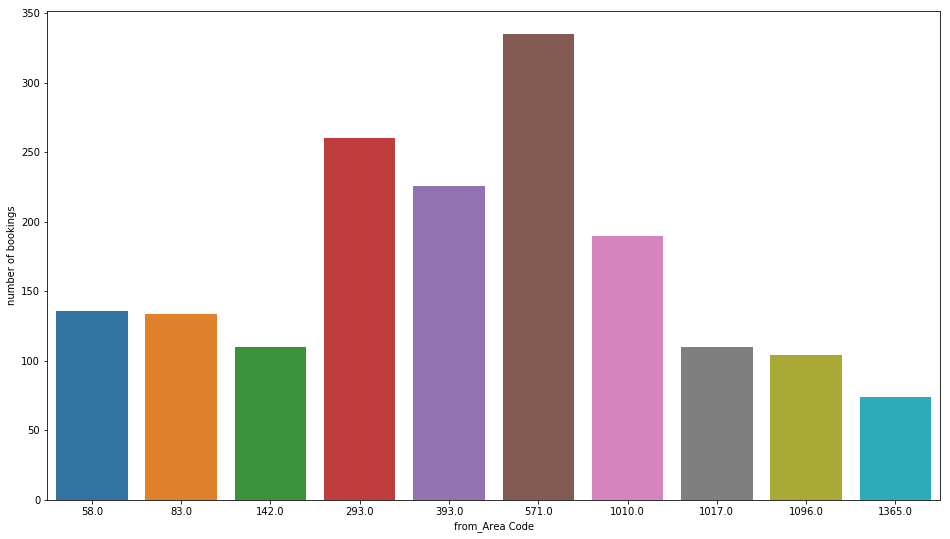

In [13]:
from_area_booking_counter = Counter(df['from_area_id'])
from_area_booking_counter = sorted(from_area_booking_counter.items(), key = operator.itemgetter(1))
top_10_from_area_booking = from_area_booking_counter[-10:]

area_code = []
number_of_bookings = []

for i,j in top_10_from_area_booking:
    area_code.append(i)
    number_of_bookings.append(j)

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, number_of_bookings, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# Month wise analysis of bookings

In [14]:
def takeOutMonth(data):
    try:
        data = data.split(" ")[0].split("/")
        month = data[0]
        return month
    except:
        return data

In [15]:
def numberToMonth(data):
    MonthDict={ '1' : "January",
       '2': "February",
       '3' : "March",
       '4' : "April",
       '5' : "May",
       '6' : "June",
       '7' : "July",
       '8' : "August",
       '9' : "September",
       '10' : "October",
       '11' : "November",
       '12' : "December"
}
    return MonthDict[data]

In [16]:
def applyFunc(toColumn, addedColumnName, func):
    df[addedColumnName] = df[toColumn].apply(lambda x: func(x))

In [17]:
applyFunc('from_date', 'month', takeOutMonth)
applyFunc('month', 'month', numberToMonth)

Text(0, 0.5, 'no. of bookings')

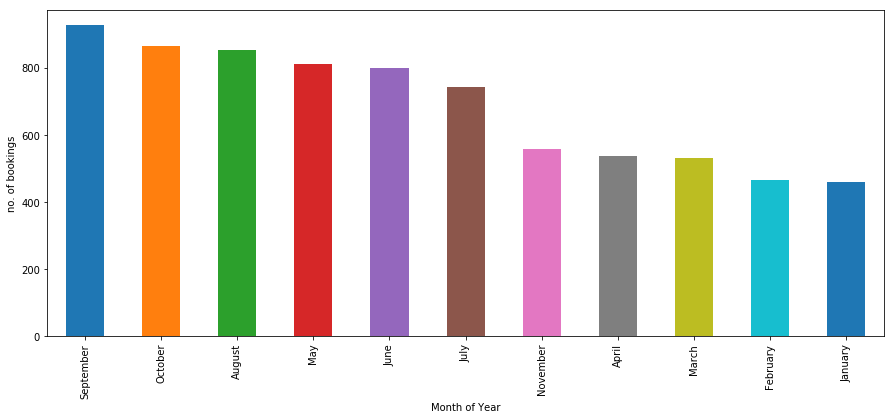

In [20]:
plot = df['month'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("Month of Year")
plot.set_ylabel("no. of bookings")

In [64]:
df_with_to_date = df[pd.notnull(df['to_date'])]

df_with_to_date = df_with_to_date.reset_index()

df_with_to_date = df_with_to_date.drop(['index'], axis=1)

# Month Wise Analysis

In [27]:
def areaMonthWise(month):
    df_to_use = df[df['month'] == month]
    df_to_use_counter = Counter(df_to_use['from_area_id'])
    df_to_use_counter = sorted(df_to_use_counter.items(), key = operator.itemgetter(1))
    
    top_10 = df_to_use_counter[-10:]
    
    area_code = []
    freq = []
    for i, j in top_10:
        area_code.append(i)
        freq.append(j)
    fig, ax = pyplot.subplots(figsize=(16,9))
    ax = sns.barplot(area_code, freq, ax=ax)
    ax.set(xlabel="from_Area Code", ylabel="number of bookings in the month of {}".format(month))

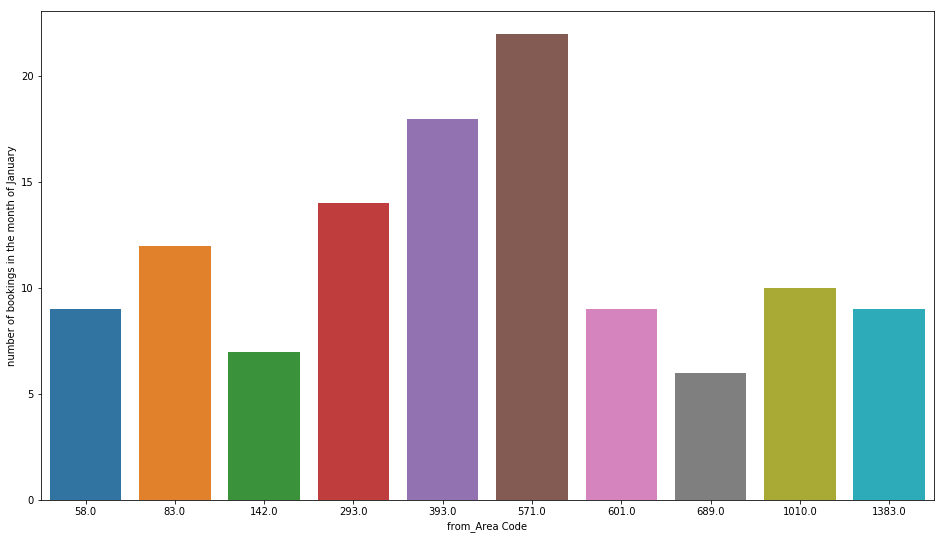

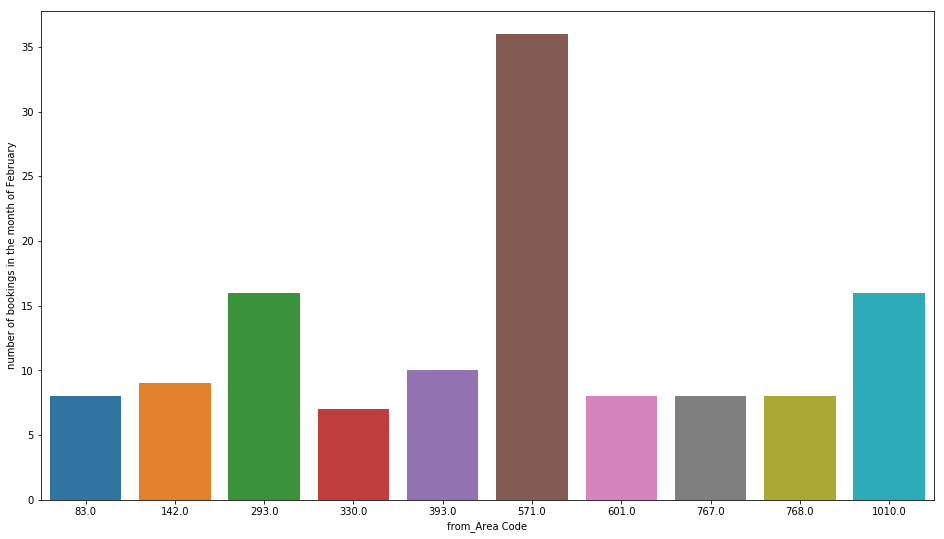

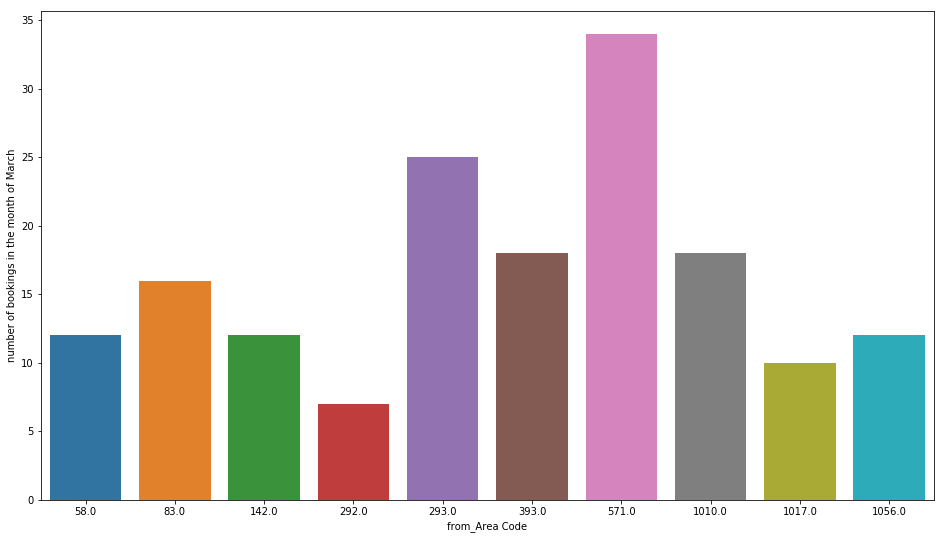

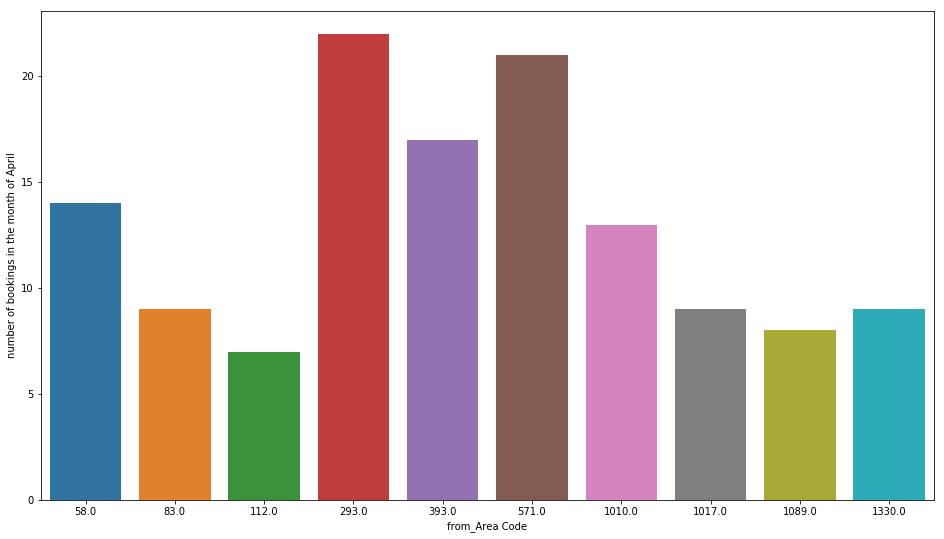

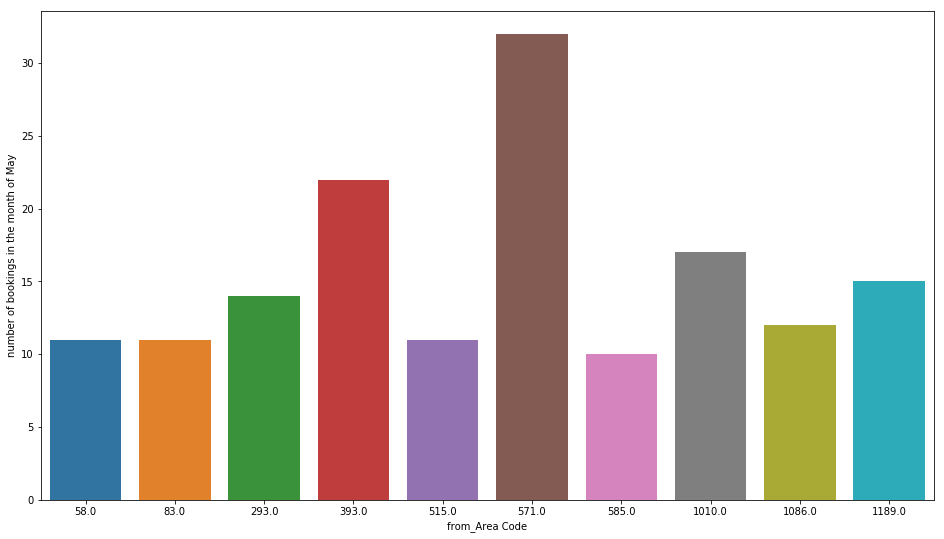

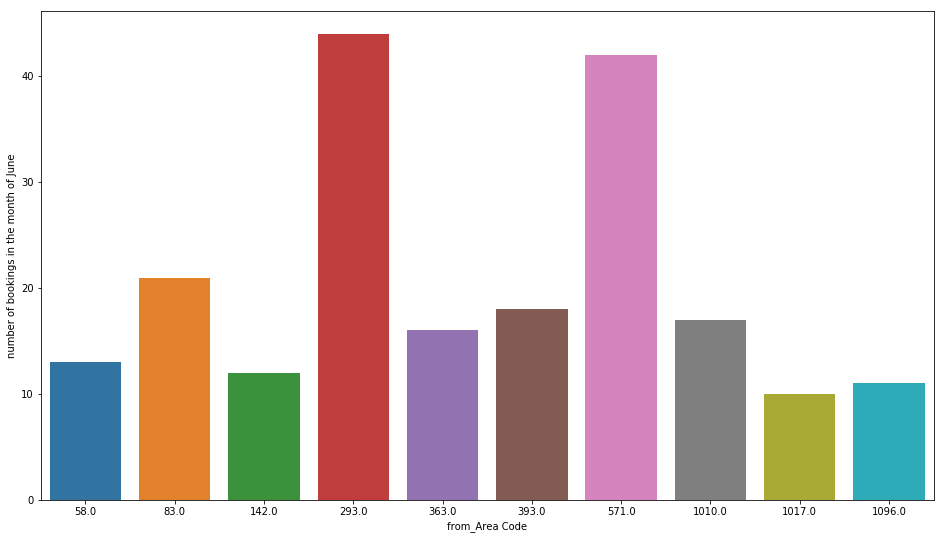

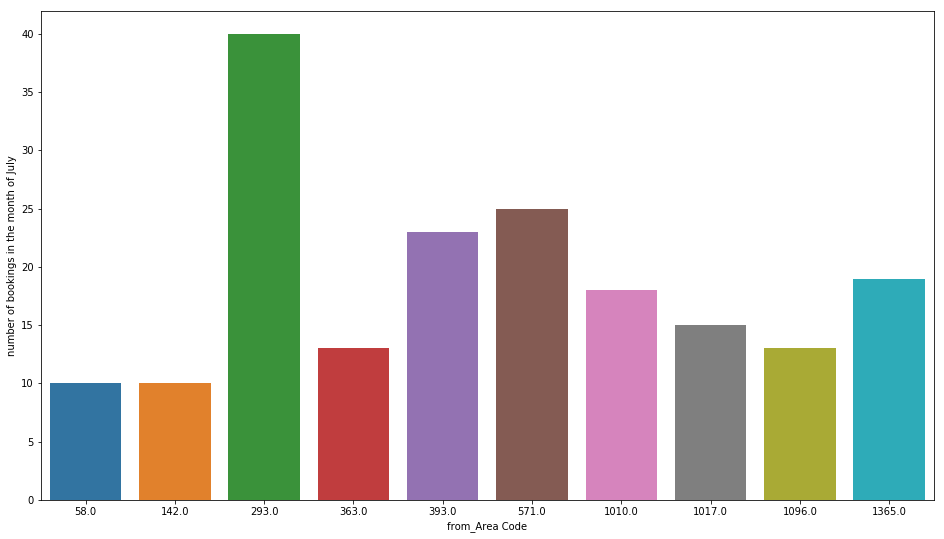

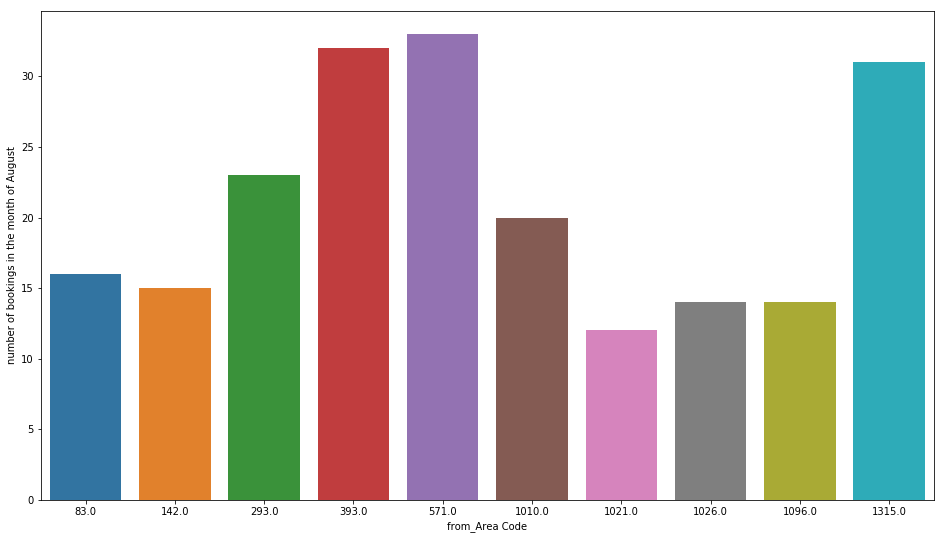

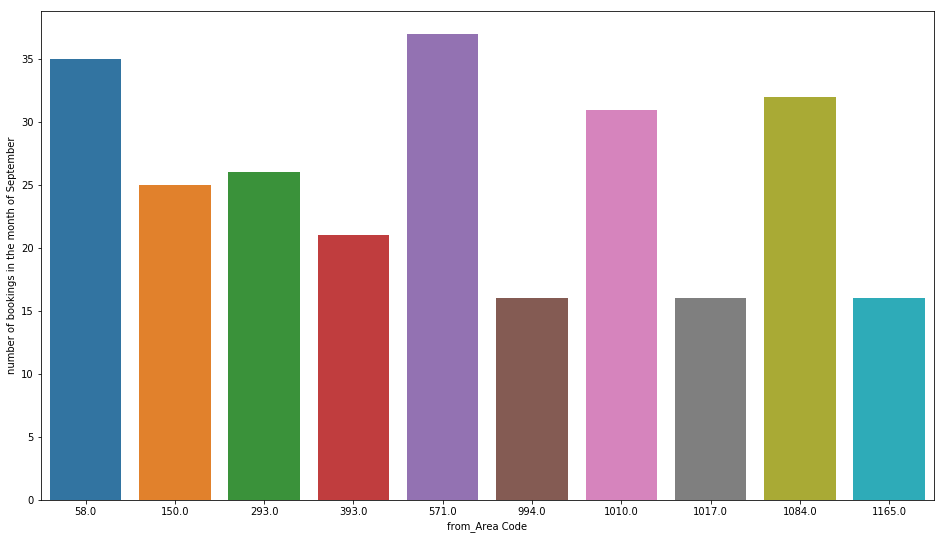

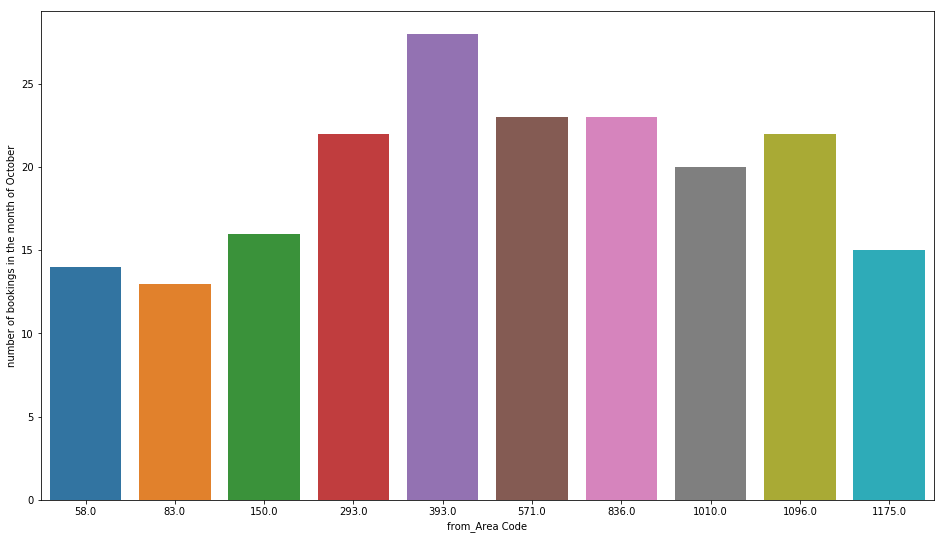

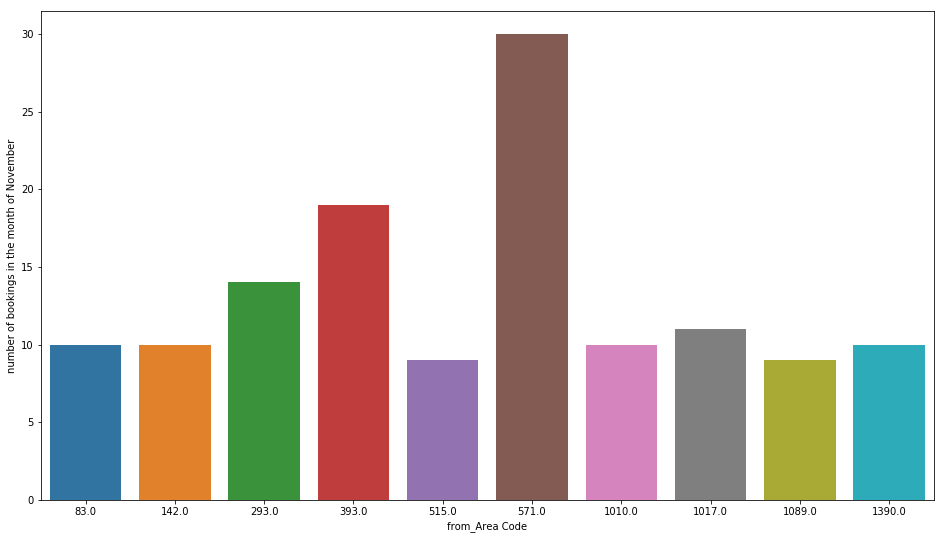

In [28]:
for i in df['month'].unique():
    areaMonthWise(i)

# Amount of time booked analysis

In [55]:
df[:2]

,Unnamed: 0,id,user_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,month
0,8,132521,22182,2.0,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,1/1/2013 9:44,12.92732,77.63575,NaN,NaN,0,January
1,20,132535,22190,2.0,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,1/1/2013 12:52,13.01854,77.63524,NaN,NaN,0,January


In [51]:
def amountOfTime(zero, one):
    datetimeFormat = '%m/%d/%Y %H:%M'
    diff = datetime.datetime.strptime(zero, datetimeFormat)\
        - datetime.datetime.strptime(one, datetimeFormat)
    return diff.seconds/3600

In [85]:
amount_of_hrs = []
for i, j in zip(df_with_to_date['from_date'], df_with_to_date['to_date']):
    amount_of_hrs.append(amountOfTime(i,j))

In [80]:
df_with_to_date[:3]

,Unnamed: 0,id,user_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,month,hours_booked
0,34,132552,22201,1.0,1323.0,NaN,NaN,NaN,1/1/2013 20:00,1/1/2013 0:00,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0,January,20.0
1,80,132609,2005,1.0,1086.0,NaN,NaN,NaN,1/2/2013 12:15,1/2/2013 0:00,1/2/2013 10:14,12.907487,77.647290,NaN,NaN,0,January,20.0
2,90,132620,22236,2.0,393.0,NaN,NaN,NaN,1/2/2013 16:00,1/2/2013 0:00,1/2/2013 11:59,13.199560,77.706880,NaN,NaN,0,January,20.0


In [112]:
def time_to_range(time):
    try:
        if 0 <= time < 2:
            return '0-2'
        if 2 <= time < 4:
            return '2-4'
        if 4 <= time < 6:
            return '4-6'
        if 6 <= time < 8:
            return '6-8'
        if 8 <= time < 10:
            return '8-10'
        if 10 <= time < 12:
            return '10-12'
        if 12 <= time < 14:
            return '12-14'
        if 14 <= time < 16:
            return '14-16'
        if 16 <= time < 18:
            return '16-18'
        if 18 <= time < 20:
            return '18-20'
        if 20 <= time < 22:
            return '20-22'
        if 22 <= time <= 24:
            return '22-24'
    except Exception as e:
        print(e)
        return time

In [114]:
df_with_to_date['hours_range'] = df_with_to_date['hours_booked'].apply(lambda x: time_to_range(x))

Text(0, 0.5, 'no. of bookings')

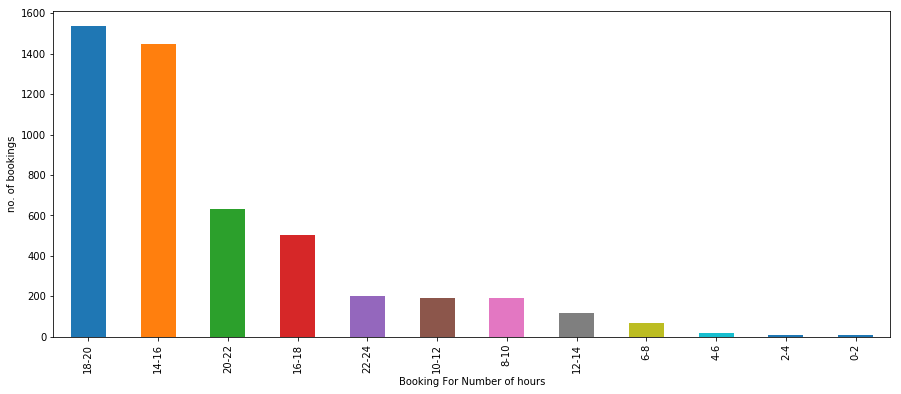

In [116]:
plot = df_with_to_date['hours_range'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("Booking For Number of hours")
plot.set_ylabel("no. of bookings")

In [120]:
def hourRangeArea(hourRange):
    df_to_use = df_with_to_date[df_with_to_date['hours_range'] == hourRange]
    df_to_use_counter = Counter(df_to_use['from_area_id'])
    df_to_use_counter = sorted(df_to_use_counter.items(), key = operator.itemgetter(1))
    
    top_10 = df_to_use_counter[-10:]
    
    area_code = []
    freq = []
    for i, j in top_10:
        area_code.append(i)
        freq.append(j)
    fig, ax = pyplot.subplots(figsize=(16,9))
    ax = sns.barplot(area_code, freq, ax=ax)
    ax.set(xlabel="from_Area Code", ylabel="number of bookings for the time range of {} hrs".format(hourRange))

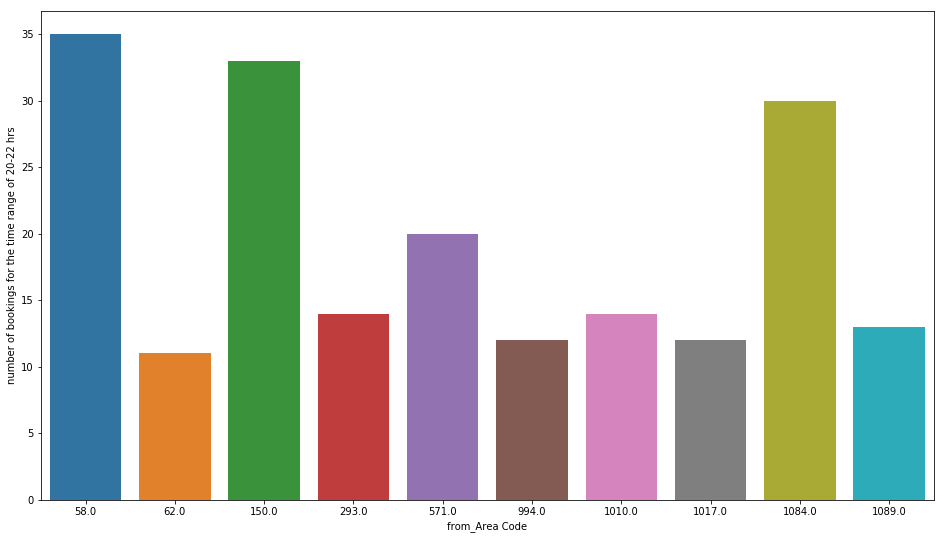

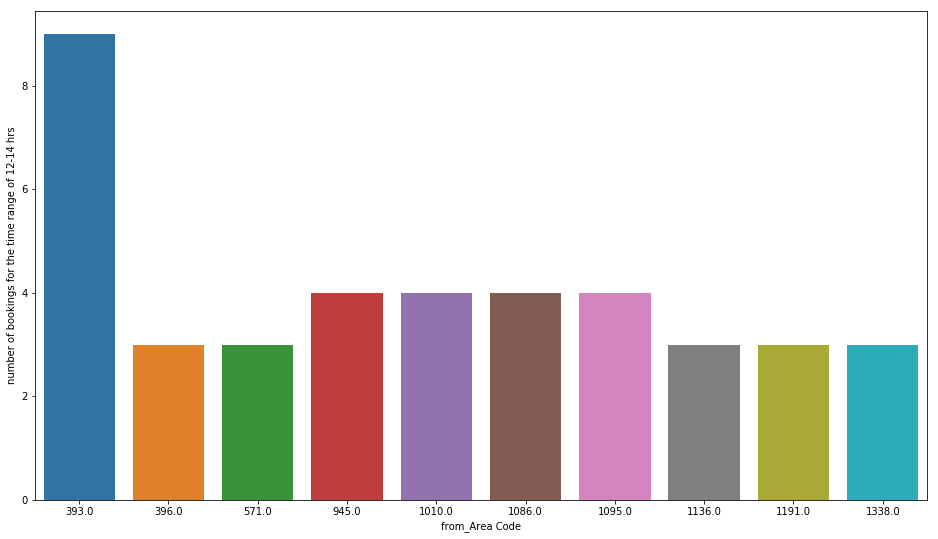

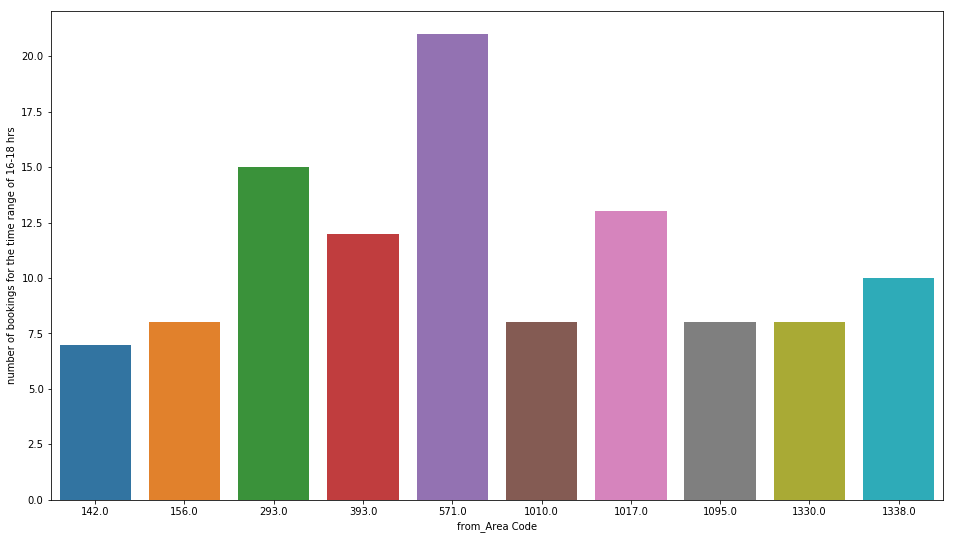

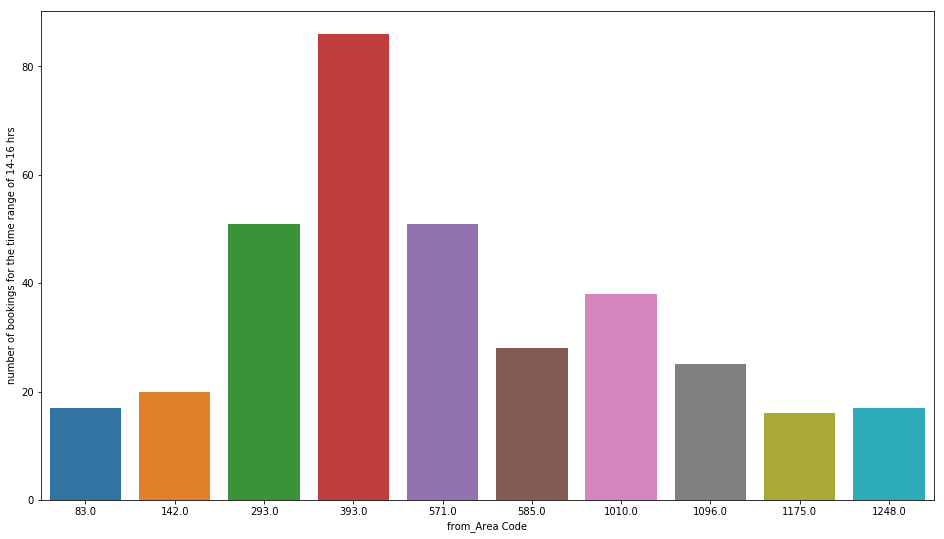

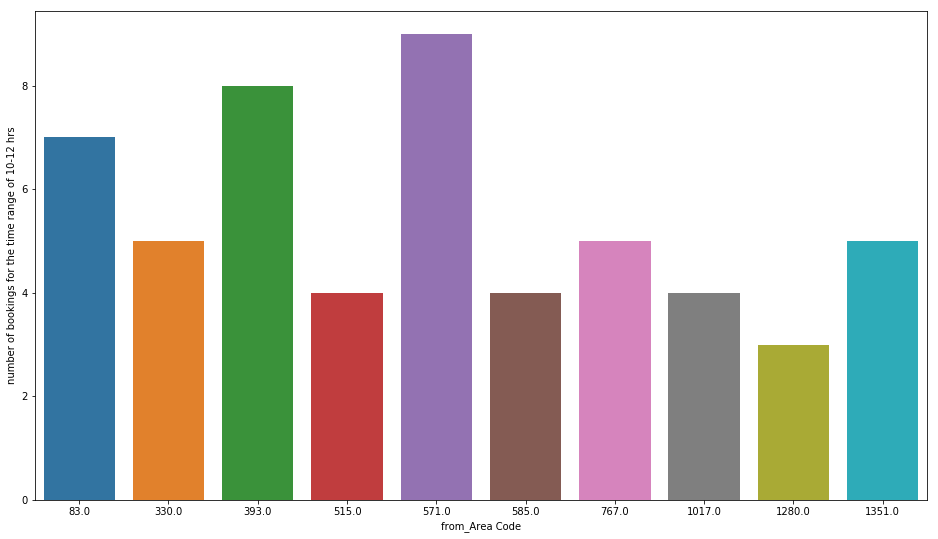

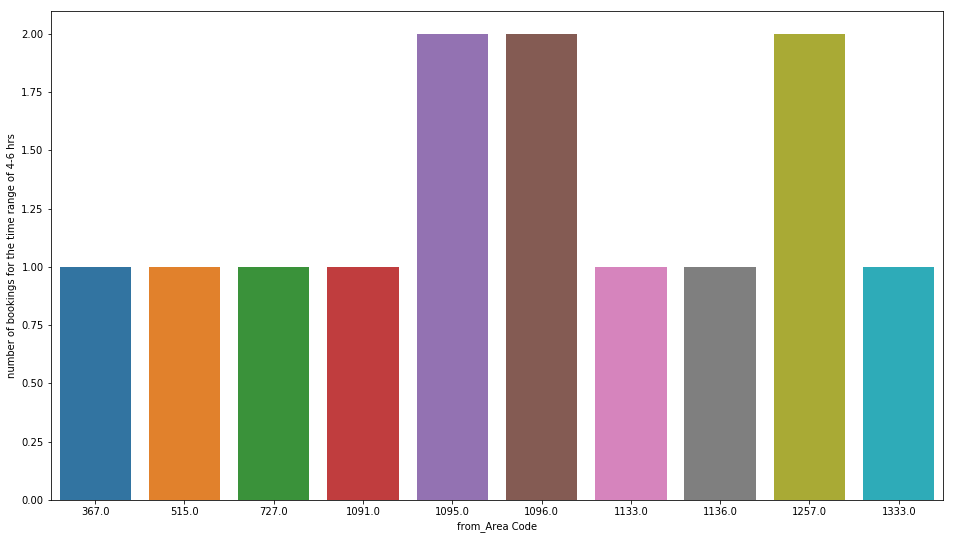

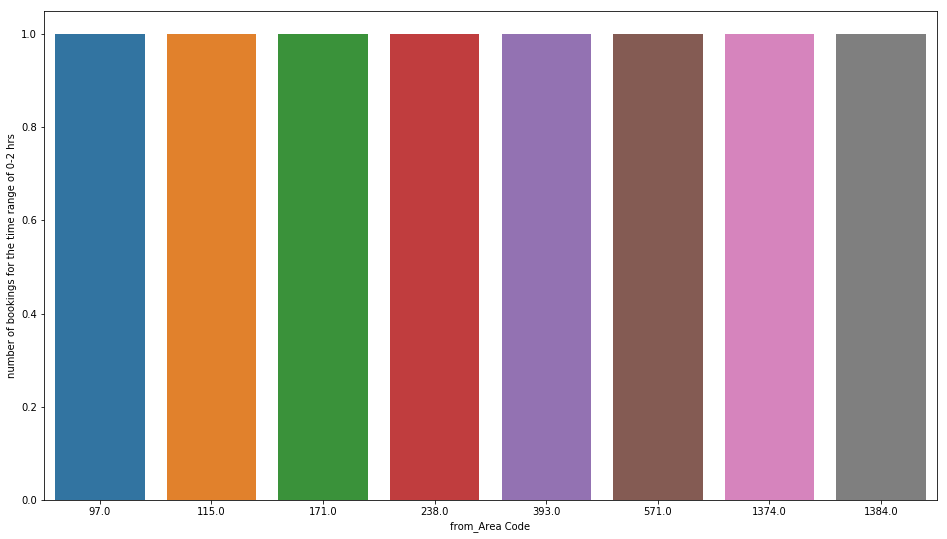

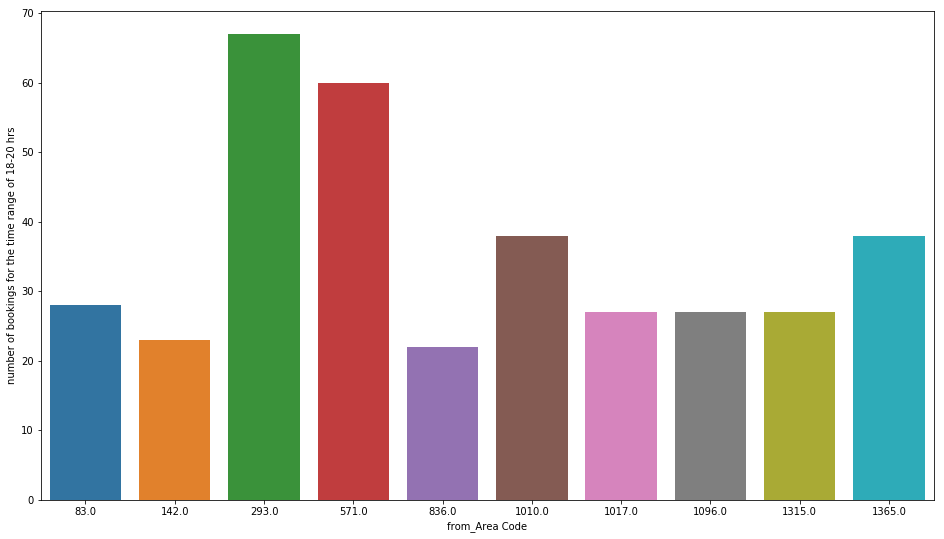

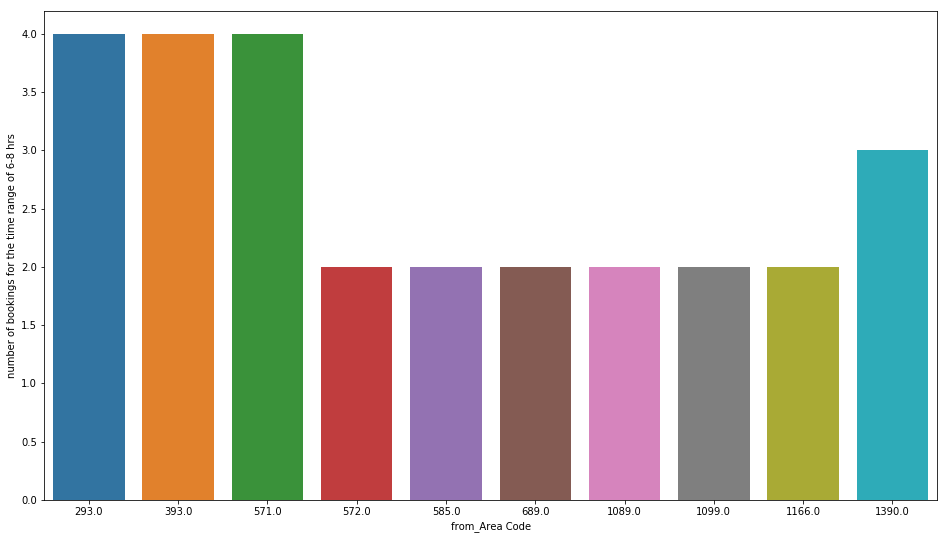

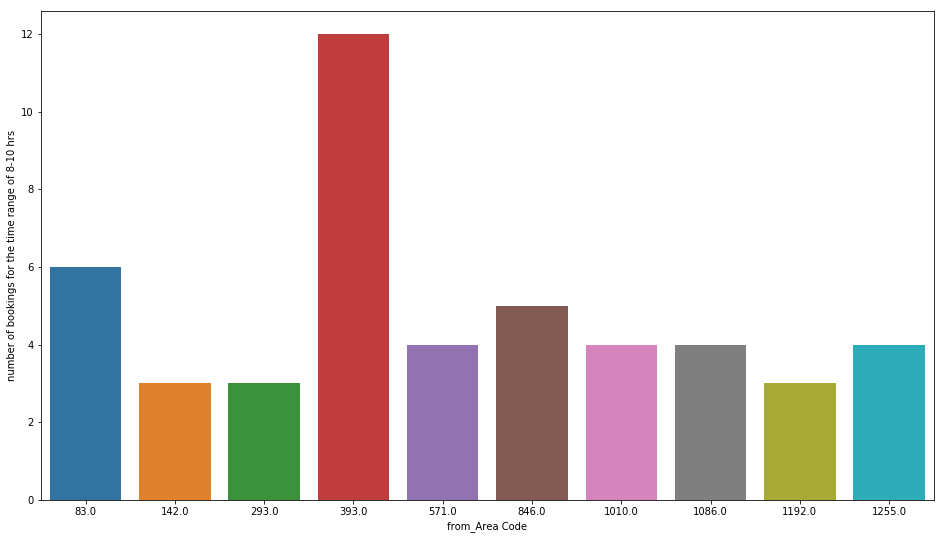

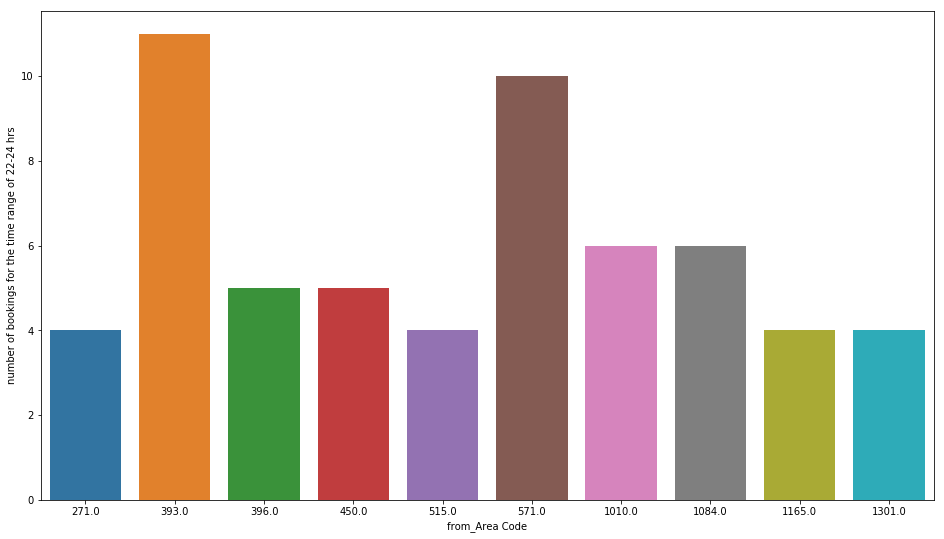

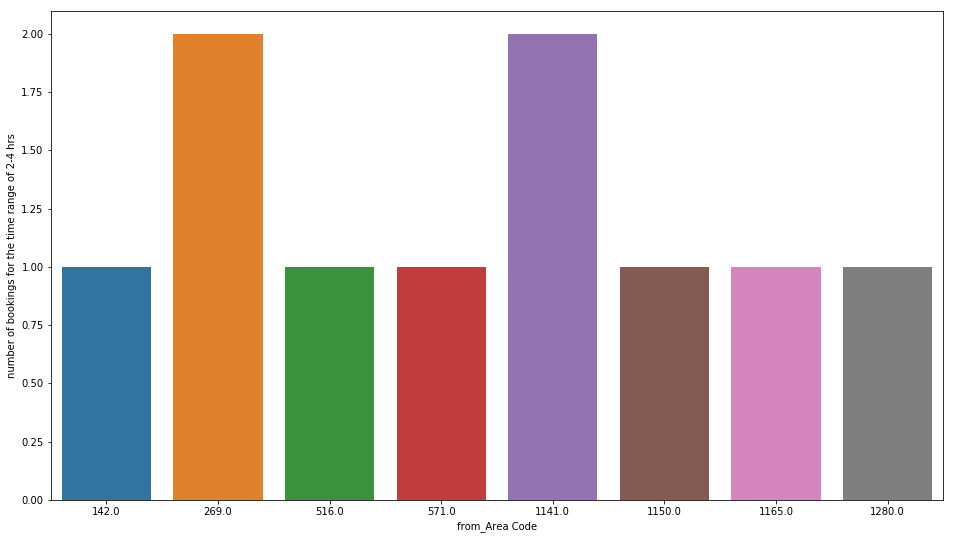

In [121]:
for i in df_with_to_date['hours_range'].unique():
    hourRangeArea(i)

# Day wise analysis

In [122]:
def findDay(date): 
    date = date.split(" ")[0]
    born = datetime.datetime.strptime(date, '%m/%d/%Y').weekday() 
    return (calendar.day_name[born]) 

In [123]:
def applyFunc(toColumn, addedColumnName, func):
    df[addedColumnName] = df[toColumn].apply(lambda x: func(x))

In [126]:
applyFunc('from_date', 'day', findDay)

In [130]:
def numberOfBookingsInADay(day):
    df_to_use = df[df['day'] == day]
    df_to_use_counter = Counter(df_to_use['from_area_id'])
    df_to_use_counter = sorted(df_to_use_counter.items(), key = operator.itemgetter(1))
    
    top_10 = df_to_use_counter[-10:]
    
    area_code = []
    freq = []
    for i, j in top_10:
        area_code.append(i)
        freq.append(j)
    fig, ax = pyplot.subplots(figsize=(16,9))
    ax = sns.barplot(area_code, freq, ax=ax)
    ax.set(xlabel="from_Area Code", ylabel="number of bookings on {}".format(day))

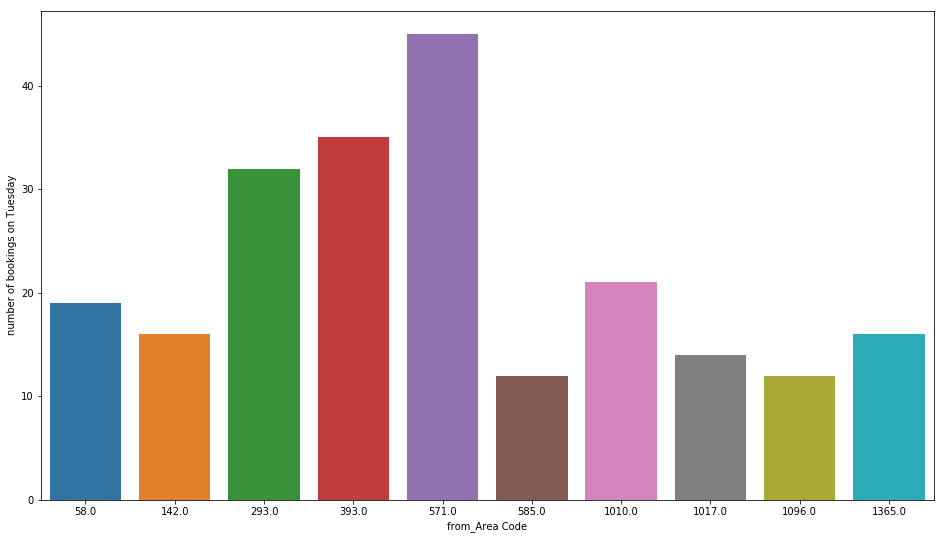

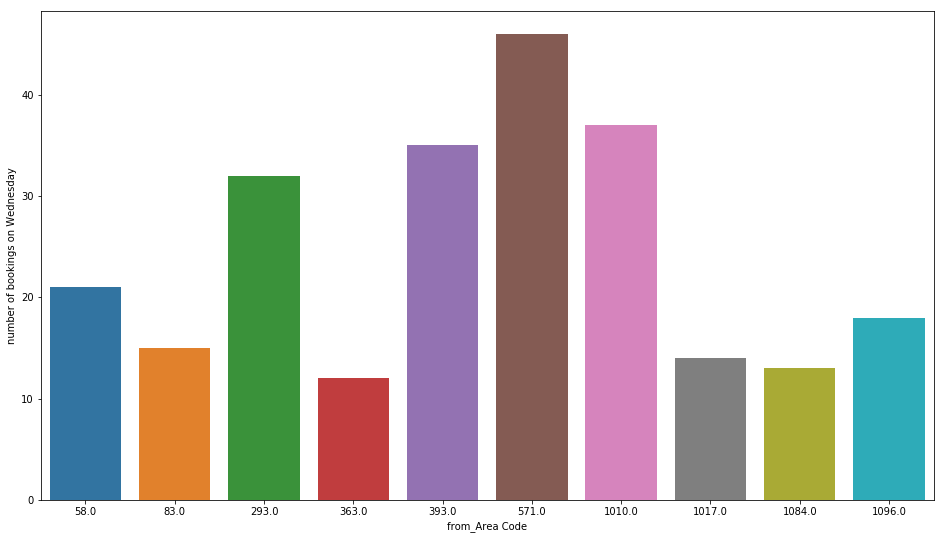

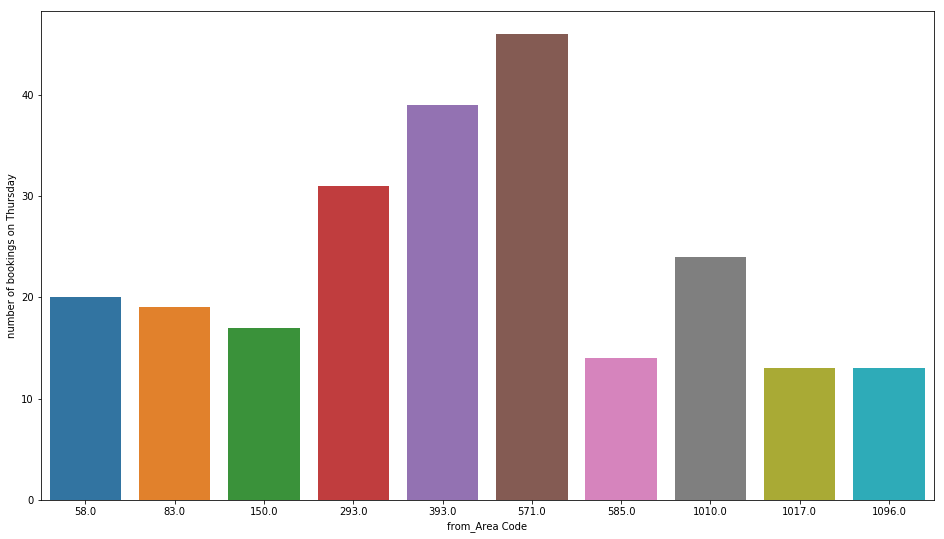

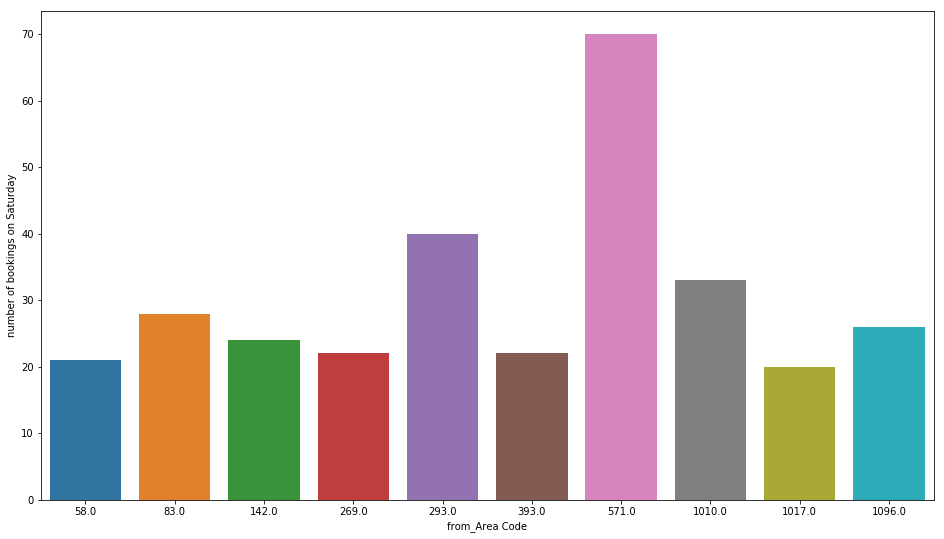

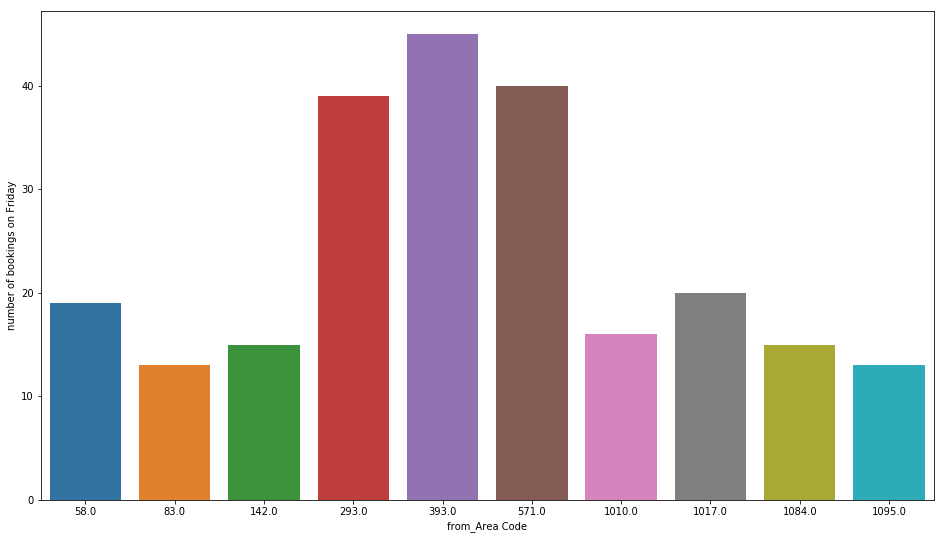

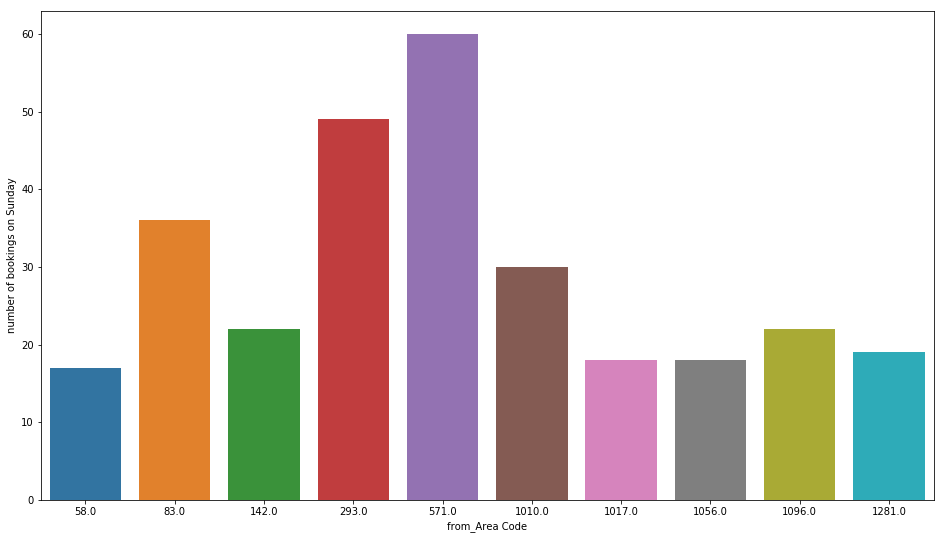

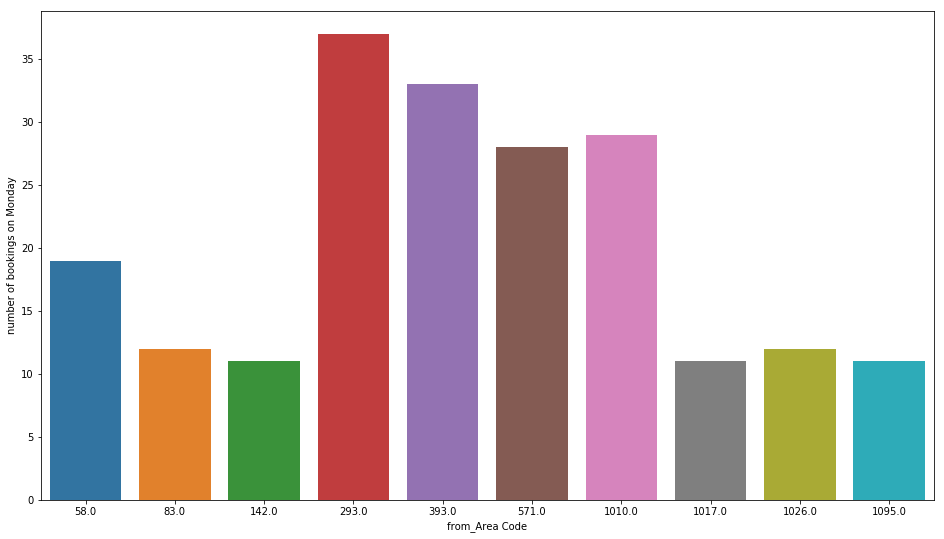

In [131]:
for i in df['day'].unique():
    numberOfBookingsInADay(i)